# BRI DATA HACKATHON 2021
###### Farid Lisniawan Muzakki, 25/02/2021
## People Analytics Category


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chisquare

###### Open dataset from csv file

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


### Data Preparing

###### Make some synthesis feature from the dataset
Convert categorical data into one-hot-encoder array

In [4]:
# prepare input data
def prepare_inputs(train_data):
	ohe = OneHotEncoder()
	ohe.fit(train_data.reshape(-1,1))
	train_data_enc = ohe.transform(train_data.reshape(-1,1)).toarray()
	return train_data_enc

In [5]:
# Job Level
job_level = prepare_inputs(np.array(train_data['job_level']))

In [6]:
# Job Duration in Current Job Level
duration_job_level = train_data['job_duration_in_current_job_level']

In [7]:
# Person Level
person_level = prepare_inputs(np.array(train_data['person_level']))

In [8]:
# Job Duration in Current Person Level
duration_person_level = train_data['job_duration_in_current_person_level']

In [9]:
# Job Duration in Current Branch
duration_branch = train_data['job_duration_in_current_branch']

In [10]:
# Employee Type
employee_type = prepare_inputs(np.array(train_data['Employee_type']))

In [11]:
# Gender
gender = prepare_inputs(np.array(train_data['gender']))

In [12]:
# Age
age = np.array(train_data['age'])

In [13]:
# Marriage Status
marriage_status = prepare_inputs(np.array(train_data['marital_status_maried(Y/N)']))

In [14]:
# Number of Dependences
number_of_dependences = train_data['number_of_dependences']

In [15]:
# Education Level
education_level = prepare_inputs(np.array(train_data['Education_level']))

In [16]:
# GPA 
GPA = np.array(train_data['GPA'])

In [17]:
# Year Graduated
gratuated_duration = np.array(train_data['year_graduated'])

In [18]:
# Job Duration from Training
duration_training = train_data['job_duration_from_training']

In [19]:
# Branch Rotation
branch_rotation = train_data['branch_rotation']

In [20]:
# Job Rotation
job_rotation = train_data['job_rotation']

In [21]:
# Assign of Other Position
assign_otherposition = train_data['assign_of_otherposition']

In [22]:
# Annual Leave
annual_leave = train_data['annual leave']

In [23]:
# Sick Leave
sick_leave = train_data['sick_leaves']

In [24]:
# Last Achievement
last_achievement = np.array(train_data['Last_achievement_%'])

In [25]:
# Achievement Above 100% During 3 Quartal
achivement_above = train_data['Achievement_above_100%_during3quartal']

In [26]:
# Best Performance
best_performance = train_data['Best Performance']

In [27]:
for i in range(len(train_data)):
    # Calculate Age
    age[i] = 2020 - age[i]
 
    # Standarize GPA
    if GPA[i] <= 4.0:
        pass
    elif GPA[i] <= 10.0:
        GPA[i] = GPA[i] * 0.4
    elif GPA[i] <= 100.0:
        GPA[i] = GPA[i] * 0.04
    else:
        GPA[i] = GPA[i] * 0.01
        
    # Calculate Year from Graduation
    gratuated_duration[i] = 2021 - int(gratuated_duration[i])
    
    # Normalize Last Achievement
    last_achievement[i] = last_achievement[i]/100

###### Make a new dataset which will be used for the next process

In [28]:
train_data_processed = pd.DataFrame({})
train_data_processed["job_level_3"] = job_level[:,0]
train_data_processed["job_level_4"] = job_level[:,1]
train_data_processed["job_level_5"] = job_level[:,2]
train_data_processed["job_level_more_3"] = job_level[:,1]+job_level[:,2]
train_data_processed["duration_job_level"] = duration_job_level
train_data_processed["person_level_1"] = person_level[:,0]
train_data_processed["person_level_2"] = person_level[:,1]
train_data_processed["person_level_3"] = person_level[:,2]
train_data_processed["person_level_4"] = person_level[:,3]
train_data_processed["person_level_5"] = person_level[:,4]
train_data_processed["person_level_6"] = person_level[:,5]
train_data_processed["person_level_7"] = person_level[:,6]
train_data_processed["person_level_8"] = person_level[:,7]
train_data_processed["person_level_more_1"] = person_level[:,1]+person_level[:,2]+person_level[:,3]+person_level[:,4]+person_level[:,5]+person_level[:,6]+person_level[:,7]
train_data_processed["person_level_more_2"] = person_level[:,2]+person_level[:,3]+person_level[:,4]+person_level[:,5]+person_level[:,6]+person_level[:,7]
train_data_processed["person_level_more_3"] = person_level[:,3]+person_level[:,4]+person_level[:,5]+person_level[:,6]+person_level[:,7]
train_data_processed["person_level_more_4"] = person_level[:,4]+person_level[:,5]+person_level[:,6]+person_level[:,7]
train_data_processed["person_level_more_5"] = person_level[:,5]+person_level[:,6]+person_level[:,7]
train_data_processed["person_level_more_6"] = person_level[:,6]+person_level[:,7]
train_data_processed["duration_person_level"] = duration_person_level
train_data_processed["duration_branch"] = duration_branch
train_data_processed["employee_type_A"] = employee_type[:,0]
train_data_processed["employee_type_B"] = employee_type[:,1]
train_data_processed["employee_type_C"] = employee_type[:,2]
train_data_processed["gender_m"] = gender[:,0]
train_data_processed["gender_f"] = gender[:,1]
train_data_processed["age"] = age
train_data_processed["marriage_status_y"] = marriage_status[:,1]
train_data_processed["number_of_dependences"] = number_of_dependences
train_data_processed["education_level_0"] = education_level[:,0]
train_data_processed["education_level_1"] = education_level[:,1]
train_data_processed["education_level_2"] = education_level[:,2]
train_data_processed["education_level_3"] = education_level[:,3]
train_data_processed["education_level_4"] = education_level[:,4]
train_data_processed["education_level_5"] = education_level[:,5]
train_data_processed["education_level_more_0"] = education_level[:,1]+education_level[:,2]+education_level[:,3]+education_level[:,4]+education_level[:,5]
train_data_processed["education_level_more_1"] = education_level[:,2]+education_level[:,3]+education_level[:,4]+education_level[:,5]
train_data_processed["education_level_more_2"] = education_level[:,3]+education_level[:,4]+education_level[:,5]
train_data_processed["education_level_more_3"] = education_level[:,4]+education_level[:,5]
train_data_processed["GPA"] = GPA
train_data_processed["graduated_duration"] = gratuated_duration
train_data_processed["duration_training"] = duration_training
train_data_processed["branch_rotation"] = branch_rotation
train_data_processed["job_rotation"] = job_rotation
train_data_processed["assign_otherposition"] = assign_otherposition
train_data_processed["annual_leave"] = annual_leave
train_data_processed["sick_leave"] = sick_leave
train_data_processed["last_achievement"] = last_achievement
train_data_processed["achievement_above"] = achivement_above
train_data_processed["best_performance"] = best_performance

In [29]:
# Save new dataset
# train_data_processed.to_csv("train_processed.csv", index=False)

In [30]:
train_data_processed

,job_level_3,job_level_4,job_level_5,job_level_more_3,duration_job_level,person_level_1,person_level_2,person_level_3,person_level_4,person_level_5,...,graduated_duration,duration_training,branch_rotation,job_rotation,assign_otherposition,annual_leave,sick_leave,last_achievement,achievement_above,best_performance
0,0.0,1.0,0.0,1.0,1.352775,0.0,0.0,1.0,0.0,0.0,...,10,4,2,3,2,3,0,0.4637,0.0,0
1,0.0,1.0,0.0,1.0,1.292285,0.0,0.0,1.0,0.0,0.0,...,14,4,4,3,0,0,1,0.4768,0.0,0
2,0.0,0.0,1.0,1.0,2.565151,0.0,0.0,0.0,0.0,0.0,...,32,28,10,9,6,2,1,0.4073,0.0,0
3,0.0,0.0,1.0,1.0,2.828427,0.0,0.0,0.0,0.0,0.0,...,34,29,11,6,0,4,10,0.4742,0.0,1
4,0.0,0.0,1.0,1.0,2.828427,0.0,0.0,0.0,0.0,0.0,...,36,30,9,8,2,3,0,0.4718,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,0.0,1.0,0.0,1.0,1.256981,0.0,0.0,1.0,0.0,0.0,...,5,4,3,3,0,4,1,0.5087,0.0,0
11149,0.0,1.0,0.0,1.0,1.385641,0.0,0.0,1.0,0.0,0.0,...,6,3,1,2,0,6,0,0.7991,0.0,0
11150,0.0,1.0,0.0,1.0,1.256981,0.0,0.0,1.0,0.0,0.0,...,4,2,1,2,0,4,0,0.7838,0.0,0
11151,0.0,1.0,0.0,1.0,1.118034,0.0,0.0,1.0,0.0,0.0,...,9,5,5,4,0,4,1,0.8594,1.0,0


In [31]:
train_data_processed.describe()

,job_level_3,job_level_4,job_level_5,job_level_more_3,duration_job_level,person_level_1,person_level_2,person_level_3,person_level_4,person_level_5,...,graduated_duration,duration_training,branch_rotation,job_rotation,assign_otherposition,annual_leave,sick_leave,last_achievement,achievement_above,best_performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,...,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,0.003228,0.933650,0.063122,0.996772,1.433208,0.001704,0.001435,0.865686,0.067874,0.027616,...,11.825876,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,0.722349,0.679071,0.146777
std,0.056725,0.248904,0.243193,0.056725,0.431086,0.041241,0.037851,0.341004,0.251541,0.163877,...,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,0.230304,1.107381,0.353899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.045100,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.224745,0.000000,0.000000,1.000000,0.000000,0.000000,...,9.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.566500,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.352775,0.000000,0.000000,1.000000,0.000000,0.000000,...,11.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.716750,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.414214,0.000000,0.000000,1.000000,0.000000,0.000000,...,13.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,0.881725,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.958040,1.000000,1.000000,1.000000,1.000000,1.000000,...,39.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,1.300000,3.000000,1.000000


###### Fill nan value in dataset with 0

In [32]:
pd.set_option('display.max_columns',len(train_data_processed.T))
train_data_processed.fillna(0)

,job_level_3,job_level_4,job_level_5,job_level_more_3,duration_job_level,person_level_1,person_level_2,person_level_3,person_level_4,person_level_5,person_level_6,person_level_7,person_level_8,person_level_more_1,person_level_more_2,person_level_more_3,person_level_more_4,person_level_more_5,person_level_more_6,duration_person_level,duration_branch,employee_type_A,employee_type_B,employee_type_C,gender_m,gender_f,age,marriage_status_y,number_of_dependences,education_level_0,education_level_1,education_level_2,education_level_3,education_level_4,education_level_5,education_level_more_0,education_level_more_1,education_level_more_2,education_level_more_3,GPA,graduated_duration,duration_training,branch_rotation,job_rotation,assign_otherposition,annual_leave,sick_leave,last_achievement,achievement_above,best_performance
0,0.0,1.0,0.0,1.0,1.352775,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.352775,1.732051,1.0,0.0,0.0,0.0,1.0,35,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.860,10,4,2,3,2,3,0,0.4637,0.0,0
1,0.0,1.0,0.0,1.0,1.292285,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.292285,1.039230,1.0,0.0,0.0,0.0,1.0,31,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.912,14,4,4,3,0,0,1,0.4768,0.0,0
2,0.0,0.0,1.0,1.0,2.565151,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.308679,1.780449,0.0,0.0,1.0,1.0,0.0,50,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,32,28,10,9,6,2,1,0.4073,0.0,0
3,0.0,0.0,1.0,1.0,2.828427,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000,1.385641,1.0,0.0,0.0,0.0,1.0,53,1.0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,34,29,11,6,0,4,10,0.4742,0.0,1
4,0.0,0.0,1.0,1.0,2.828427,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.828427,0.707107,1.0,0.0,0.0,0.0,1.0,55,1.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.880,36,30,9,8,2,3,0,0.4718,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,0.0,1.0,0.0,1.0,1.256981,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.256981,1.224745,1.0,0.0,0.0,0.0,1.0,34,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.330,5,4,3,3,0,4,1,0.5087,0.0,0
11149,0.0,1.0,0.0,1.0,1.385641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.385641,1.802776,0.0,1.0,0.0,1.0,0.0,32,1.0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.000,6,3,1,2,0,6,0,0.7991,0.0,0
11150,0.0,1.0,0.0,1.0,1.256981,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.256981,1.385641,0.0,1.0,0.0,0.0,1.0,29,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.480,4,2,1,2,0,4,0,0.7838,0.0,0
11151,0.0,1.0,0.0,1.0,1.118034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.118034,0.000000,1.0,0.0,0.0,1.0,0.0,33,1.0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.530,9,5,5,4,0,4,1,0.8594,1.0,0


###### Find correlation between features and target values and choose some features with the highest correlation

In [33]:
feature_correlation = train_data_processed.corr()

In [34]:
positive_corr = feature_correlation.loc[feature_correlation['best_performance'] >= 0.015]
positive_corr['best_performance']

person_level_6           0.021729
person_level_8           0.022831
person_level_more_5      0.021283
duration_person_level    0.016159
duration_branch          0.017283
employee_type_B          0.023097
gender_m                 0.019048
age                      0.018997
duration_training        0.019229
branch_rotation          0.016063
best_performance         1.000000
Name: best_performance, dtype: float64

In [35]:
negative_corr = feature_correlation.loc[feature_correlation['best_performance'] <= -0.015]
negative_corr['best_performance']

person_level_5    -0.020420
employee_type_A   -0.021062
gender_f          -0.019048
GPA               -0.017489
Name: best_performance, dtype: float64

In [36]:
all_columns = ['job_level_3','job_level_4','job_level_5','job_level_more_3','duration_job_level','person_level_1','person_level_2','person_level_3','person_level_4','person_level_5',
              'person_level_6','person_level_7','person_level_8','person_level_more_1','person_level_more_2','person_level_more_3','person_level_more_4','person_level_more_5','person_level_more_6',
              'duration_person_level','duration_branch','employee_type_A','employee_type_B','employee_type_C','gender_m','gender_f','age','marriage_status_y','number_of_dependences',
              'education_level_0','education_level_1','education_level_2','education_level_3','education_level_4','education_level_5','education_level_more_0','education_level_more_1',
              'education_level_more_2','education_level_more_3','GPA','graduated_duration','duration_training','branch_rotation','job_rotation','assign_otherposition','annual_leave',
              'sick_leave','last_achievement','achievement_above']

In [37]:
best_corr_column = ['person_level_5','person_level_6','person_level_8','gender_m','duration_person_level','duration_branch','employee_type_B','age','duration_training','branch_rotation','employee_type_A','GPA']
numeric_column = ['duration_person_level','duration_branch','age','duration_training','branch_rotation','GPA']

###### Make boxplots for some columns with numeric values

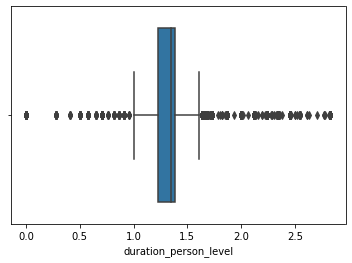

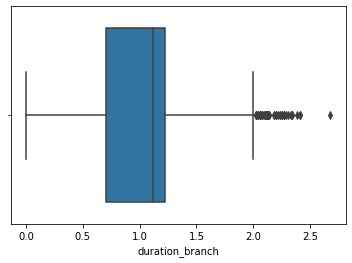

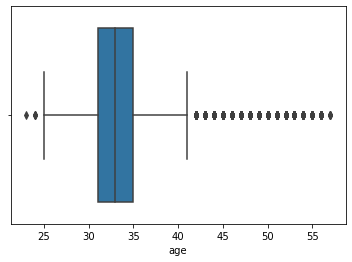

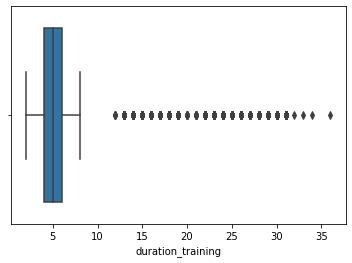

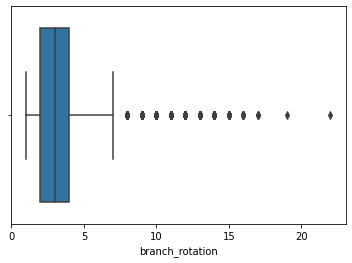

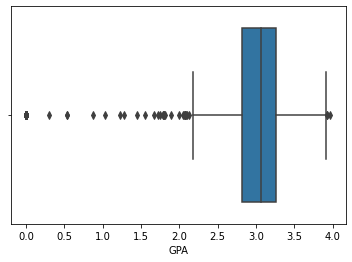

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in numeric_column:
    sns.boxplot(x=str(i), data=train_data_processed)
    plt.show()

###### Find correlation between each feature and eliminate redundant column

In [39]:
train_data_processed[best_corr_column+['best_performance']].corr()

,person_level_5,person_level_6,person_level_8,gender_m,duration_person_level,duration_branch,employee_type_B,age,duration_training,branch_rotation,employee_type_A,GPA,best_performance
person_level_5,1.000000,-0.031564,-0.001596,0.045359,-0.213890,0.007233,-0.111128,0.256191,0.305398,0.345812,0.100904,-0.004740,-0.020420
person_level_6,-0.031564,1.000000,-0.001774,0.040506,0.186105,0.025914,-0.123510,0.546465,0.622555,0.451469,0.117683,-0.056946,0.021729
person_level_8,-0.001596,-0.001774,1.000000,-0.005677,0.043146,0.008625,-0.006244,0.020110,0.023935,0.032683,0.006897,0.002776,0.022831
gender_m,0.045359,0.040506,-0.005677,1.000000,0.024683,0.021854,0.066924,0.091582,0.135447,0.091801,-0.129776,0.017394,0.019048
duration_person_level,-0.213890,0.186105,0.043146,0.024683,1.000000,0.022653,-0.155398,0.395344,0.441083,0.313990,0.137147,-0.026591,0.016159
duration_branch,0.007233,0.025914,0.008625,0.021854,0.022653,1.000000,-0.032996,0.023772,0.037377,-0.127915,0.006411,0.008280,0.017283
employee_type_B,-0.111128,-0.123510,-0.006244,0.066924,-0.155398,-0.032996,1.000000,-0.270684,-0.283592,-0.270825,-0.905331,-0.038948,0.023097
age,0.256191,0.546465,0.020110,0.091582,0.395344,0.023772,-0.270684,1.000000,0.885109,0.757644,0.246035,-0.086126,0.018997
duration_training,0.305398,0.622555,0.023935,0.135447,0.441083,0.037377,-0.283592,0.885109,1.000000,0.848064,0.252236,-0.064396,0.019229
branch_rotation,0.345812,0.451469,0.032683,0.091801,0.313990,-0.127915,-0.270825,0.757644,0.848064,1.000000,0.248031,-0.043225,0.016063


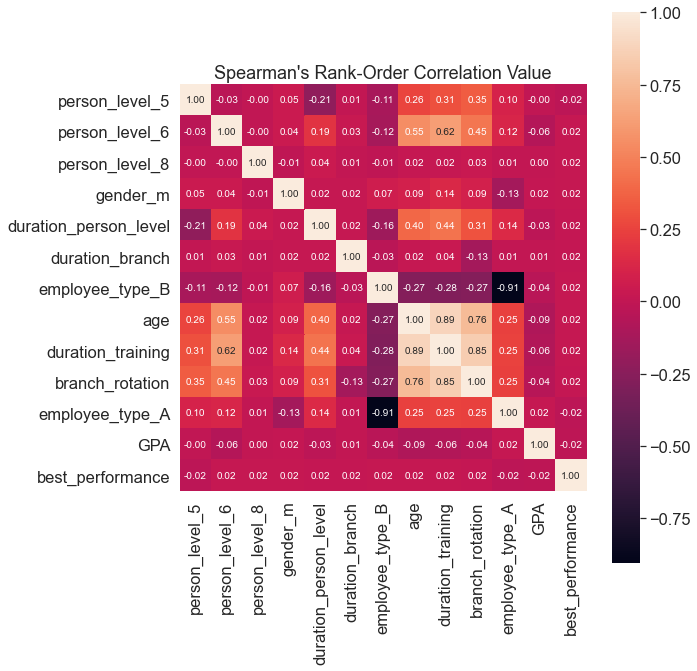

In [40]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap((train_data_processed[best_corr_column+['best_performance']]).corr(),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=best_corr_column+['best_performance'],
                 xticklabels=best_corr_column+['best_performance'])
plt.title("Spearman's Rank-Order Correlation Value")
plt.tight_layout()
plt.show()

In [41]:
final_column = ['gender_m','duration_person_level','duration_branch','duration_training','GPA']

selected_data = train_data_processed[final_column]
selected_data

,gender_m,duration_person_level,duration_branch,duration_training,GPA
0,0.0,1.352775,1.732051,4,2.860
1,0.0,1.292285,1.039230,4,2.912
2,1.0,2.308679,1.780449,28,0.000
3,0.0,1.000000,1.385641,29,0.000
4,0.0,2.828427,0.707107,30,2.880
...,...,...,...,...,...
11148,0.0,1.256981,1.224745,4,3.330
11149,1.0,1.385641,1.802776,3,3.000
11150,0.0,1.256981,1.385641,2,3.480
11151,1.0,1.118034,0.000000,5,3.530


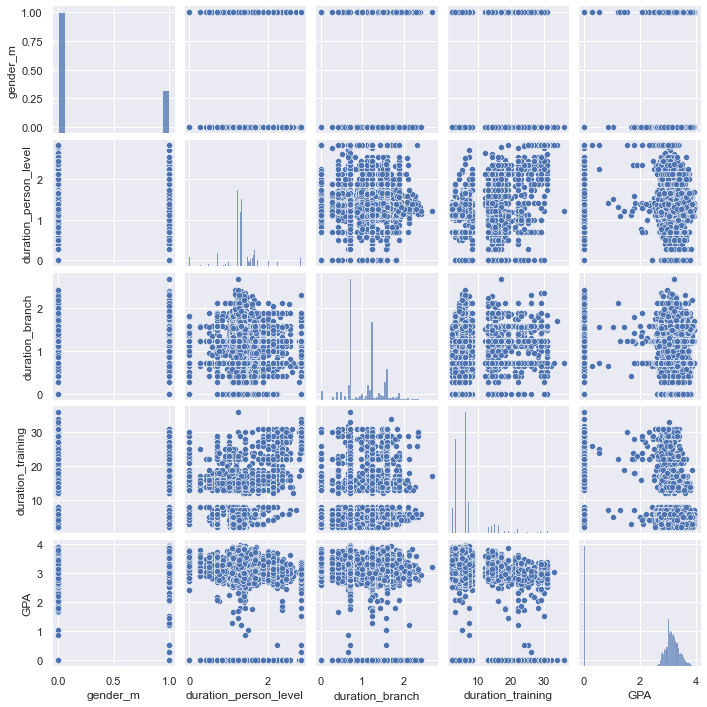

In [42]:
sns.set(font_scale=1)
sns.pairplot(selected_data[final_column], height=2.0, palette='muted')

###### Do PCA to visualize all features and make new features

In [43]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(selected_data[final_column])
principal_components

principal_data = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
principal_data

,principal component 1,principal component 2
0,-2.282767,-0.272098
1,-2.287547,-0.321225
2,21.790792,2.165036
3,22.739667,2.161416
4,23.739354,-0.734116
...,...,...
11148,-2.295193,-0.739853
11149,-3.271460,-0.405894
11150,-4.296018,-0.856262
11151,-1.295118,-0.962439


In [44]:
principal_data['best_performance'] = best_performance

principal_data

,principal component 1,principal component 2,best_performance
0,-2.282767,-0.272098,0
1,-2.287547,-0.321225,0
2,21.790792,2.165036,0
3,22.739667,2.161416,1
4,23.739354,-0.734116,0
...,...,...,...
11148,-2.295193,-0.739853,0
11149,-3.271460,-0.405894,0
11150,-4.296018,-0.856262,0
11151,-1.295118,-0.962439,0


In [45]:
principal_data.corr()

,principal component 1,principal component 2,best_performance
principal component 1,1.000000e+00,-1.276814e-16,0.019334
principal component 2,-1.276814e-16,1.000000e+00,0.016115
best_performance,1.933449e-02,1.611502e-02,1.000000


In [46]:
pca.explained_variance_ratio_

array([0.92540064, 0.05822068])

<Figure size 432x288 with 0 Axes>

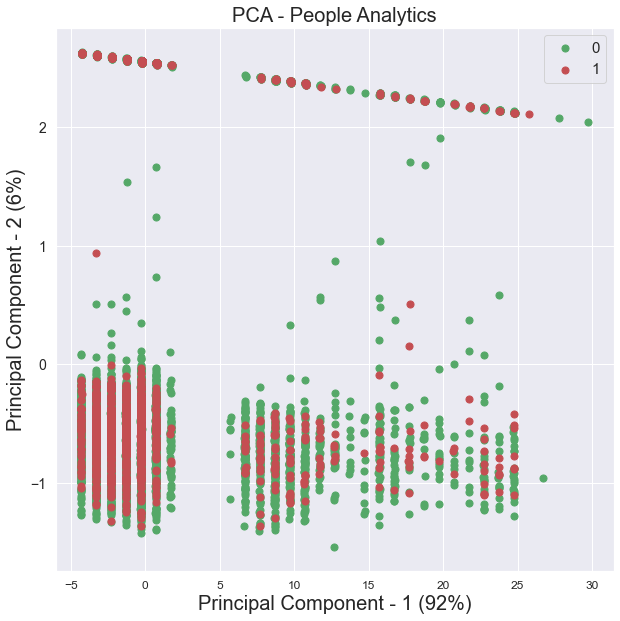

In [47]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1 (92%)',fontsize=20)
plt.ylabel('Principal Component - 2 (6%)',fontsize=20)
plt.title("PCA - People Analytics",fontsize=20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = principal_data['best_performance'] == target
    plt.scatter(principal_data.loc[indicesToKeep, 'principal component 1'], 
                principal_data.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 50)

plt.legend(targets,prop={'size': 15})

It seems that, visually and statistically, principal component features are not different from original features in predicting target.  

###### Standarize all features so they mean values are 0 and variance values are 1

In [48]:
# Features Standarization
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler().fit(selected_data.values)
standarize_data = scaler.transform(selected_data.values)

standarize_data

array([[-0.59954883,  0.01095633,  1.67361746, -0.45257384,  0.24574044],
       [-0.59954883, -0.17537023,  0.01100071, -0.45257384,  0.28681439],
       [ 1.66792086,  2.95540971,  1.78976342,  4.31564408, -2.01332663],
       ...,
       [-0.59954883, -0.28411733,  0.84230909, -0.84992533,  0.73546827],
       [ 1.66792086, -0.71211157, -2.48292441, -0.25389809,  0.77496245],
       [-0.59954883,  2.37829167,  1.05217311,  1.53418363,  0.46690785]])

In [50]:
len(standarize_data.T)

5

In [51]:
final_data = pd.DataFrame(standarize_data,columns=final_column)
final_data['best_performance'] = best_performance

final_data

,gender_m,duration_person_level,duration_branch,duration_training,GPA,best_performance
0,-0.599549,0.010956,1.673617,-0.452574,0.245740,0
1,-0.599549,-0.175370,0.011001,-0.452574,0.286814,0
2,1.667921,2.955410,1.789763,4.315644,-2.013327,0
3,-0.599549,-1.075689,0.842309,4.514320,-2.013327,1
4,-0.599549,4.556379,-0.786023,4.712996,0.261538,0
...,...,...,...,...,...,...
11148,-0.599549,-0.284117,0.456195,-0.452574,0.616986,0
11149,1.667921,0.112192,1.843342,-0.651250,0.356324,0
11150,-0.599549,-0.284117,0.842309,-0.849925,0.735468,0
11151,1.667921,-0.712112,-2.482924,-0.253898,0.774962,0


###### Balance the target compotition so all category have the same amount of data for training

In [52]:
# Check Data Balance
len_data_0 = len(final_data.loc[final_data['best_performance'] == 0])
len_data_1 = len(final_data.loc[final_data['best_performance'] == 1])

len_data_0,len_data_1

(9516, 1637)

In [53]:
data_0_downsampled = final_data.loc[final_data['best_performance'] == 0].sample(n=len_data_1)

In [54]:
frames = [final_data.loc[final_data['best_performance'] == 1],data_0_downsampled]
balanced_data = pd.concat(frames, ignore_index=True)

balanced_data

,gender_m,duration_person_level,duration_branch,duration_training,GPA,best_performance
0,-0.599549,-1.075689,0.842309,4.514320,-2.013327,1
1,-0.599549,-0.712112,-1.493470,-0.651250,-0.689482,1
2,-0.599549,-1.075689,0.456195,4.116968,-2.013327,1
3,1.667921,-0.383412,0.284638,-0.849925,-2.013327,1
4,-0.599549,-0.383412,0.200112,-0.849925,-2.013327,1
...,...,...,...,...,...,...
3269,1.667921,-0.603617,0.456195,1.534184,0.514301,0
3270,-0.599549,0.200205,-0.786023,-0.452574,-2.013327,0
3271,1.667921,0.010956,1.673617,-0.452574,0.632783,0
3272,-0.599549,-0.175370,-0.181136,-0.253898,0.759165,0


In [55]:
np.mean(balanced_data), np.std(balanced_data)

(gender_m                 0.019608
 duration_person_level    0.015875
 duration_branch          0.007645
 duration_training        0.051640
 GPA                     -0.014611
 best_performance         0.500000
 dtype: float64,
 gender_m                 1.010230
 duration_person_level    1.026758
 duration_branch          0.979762
 duration_training        1.070689
 GPA                      1.005649
 best_performance         0.500000
 dtype: float64)

###### Reindex dataset before training the model

In [56]:
# Reindex data
balanced_data = balanced_data.reindex(np.random.permutation(balanced_data.index))
balanced_data

,gender_m,duration_person_level,duration_branch,duration_training,GPA,best_performance
2806,-0.599549,-2.885938,-0.786023,1.931535,0.395818,0
1379,1.667921,0.464451,0.200112,-0.055222,0.364223,1
227,-0.599549,0.010956,1.311462,-0.055222,0.403717,1
3186,1.667921,0.200205,0.456195,2.328887,0.277336,0
558,-0.599549,0.714381,0.456195,1.335508,0.632783,1
...,...,...,...,...,...,...
1300,-0.599549,-0.284117,-1.493470,-0.452574,0.245740,1
1456,-0.599549,0.200205,0.456195,-0.253898,0.530099,1
567,-0.599549,-1.201469,-0.786023,1.534184,0.782861,1
424,1.667921,-1.075689,-2.482924,1.931535,0.435313,1


### Model Training

###### Divide dataset into train and test (or validation) with 80:20 proportion

In [57]:
# Data Partitioning
from sklearn.model_selection import train_test_split
X = balanced_data[final_column].values     
y = balanced_data['best_performance']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

###### Make machine learning model using five methods, such as logistic regression, k-Nearest Neighbour, decision tree, random forest, and gradient boosting
Adjust the hyper-parameters of the model to get the highest ROC value. Because of down sampling process, the results can be different each time the kernel is restarting, even with the same hyper-parameters.

In [58]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.0001,solver='sag',random_state=3).fit(X_train, y_train)
LR_predictions = LR.predict(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, LR_predictions))

0.5153757904751245


In [59]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9,p=3)
neigh.fit(X_train, y_train)
neigh_predictions = neigh.predict(X_test)

print(roc_auc_score(y_test, neigh_predictions))

0.5065243345085529


In [60]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=7,min_samples_split=0.05,max_features=2)
DT.fit(X_train, y_train)
DT_predictions = DT.predict(X_test)

print(roc_auc_score(y_test, DT_predictions))

0.5186402895144291


In [61]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0,n_estimators=140,min_samples_split=0.3,min_samples_leaf=0.04)
RF.fit(X_train, y_train)
RF_predictions = RF.predict(X_test)

print(roc_auc_score(y_test, RF_predictions))

0.571054153375492


In [62]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=13,learning_rate=0.003,subsample=0.5,min_samples_split=0.3)
GB.fit(X_train, y_train)
GB_predictions = GB.predict(X_test)

print(roc_auc_score(y_test, GB_predictions))

0.5504598280075363


### Model Testing
The test data is obtained from the competition organizers

In [63]:
# Predict Test Data from Competition
test_data = pd.read_csv('test.csv')
test_data

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,level_4,3.01,2015,2,2,2,0,4,0,58.60,0.0
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,level_4,3.56,2011,5,3,2,7,3,0,90.64,3.0
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,level_4,3.59,2013,3,2,3,0,16,0,13.02,0.0
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,level_4,2.93,2003,14,7,6,8,2,0,82.26,0.0


###### Adjust the test data so it have the same condition with the train data

In [64]:
# prepare test data
def prepare_test(test_data,categories):
	ohe = OneHotEncoder(categories=categories)
	ohe.fit(test_data.reshape(-1,1))
	test_data_enc = ohe.transform(test_data.reshape(-1,1)).toarray()
	return test_data_enc

In [65]:
# Gender
gender_test = prepare_test(np.array(test_data['gender']),'auto')
# Job Duration in Current Person Level
duration_person_level_test = test_data['job_duration_in_current_person_level']
# Job Duration in Current Branch
duration_branch_test = test_data['job_duration_in_current_branch']
# Job Duration from Training
duration_training_test = test_data['job_duration_from_training']
# GPA 
GPA_test = np.array(test_data['GPA'])

for i in range(len(test_data)):
    # Standarize GPA
    if GPA_test[i] <= 4.0:
        pass
    elif GPA_test[i] <= 10.0:
        GPA_test[i] = GPA_test[i] * 0.4
    elif GPA[i] <= 100.0:
        GPA_test[i] = GPA_test[i] * 0.04
    else:
        GPA_test[i] = GPA_test[i] * 0.01

In [66]:
test_data_processed = pd.DataFrame({})

test_data_processed["gender_m"] = gender_test[:,0]
test_data_processed["duration_person_level"] = duration_person_level_test
test_data_processed["duration_branch"] = duration_branch_test
test_data_processed["duration_training"] = duration_training_test
test_data_processed["GPA"] = GPA_test

test_data_processed

,gender_m,duration_person_level,duration_branch,duration_training,GPA
0,1.0,1.256981,0.707107,6,3.08
1,0.0,1.224745,1.256981,2,3.31
2,0.0,0.500000,1.081665,4,3.44
3,0.0,1.256981,1.802776,3,0.00
4,1.0,1.352775,1.224745,5,3.34
...,...,...,...,...,...
5995,0.0,1.292285,0.707107,2,3.01
5996,0.0,1.352775,1.581139,5,3.56
5997,0.0,1.385641,1.224745,3,3.59
5998,0.0,1.385641,0.648074,14,2.93


In [67]:
np.mean(test_data_processed)

gender_m                 0.270500
duration_person_level    1.347325
duration_branch          1.030270
duration_training        6.218500
GPA                      2.573312
dtype: float64

In [68]:
# Standarize Data
test_data_scaled = scaler.transform(test_data_processed.values)
test_data_scaled

array([[ 1.66792086, -0.28411733, -0.7860233 , -0.05522235,  0.41951483],
       [-0.59954883, -0.38341213,  0.53355299, -0.84992533,  0.60118806],
       [-0.59954883, -2.61582952,  0.11283516, -0.45257384,  0.70387292],
       ...,
       [-0.59954883,  0.11219196,  0.45619453, -0.65124958,  0.82235546],
       [-0.59954883,  0.11219196, -0.92768885,  1.53418363,  0.30103229],
       [-0.59954883,  0.01095633, -0.7860233 , -0.25389809,  0.41951483]])

###### Predict the results using trained models

In [69]:
np.set_printoptions(threshold=np.inf)
GB_test = GB.predict_proba(test_data_scaled)
GB.classes_, GB_test

(array([0, 1], dtype=int64),
 array([[0.51530267, 0.48469733],
        [0.48891759, 0.51108241],
        [0.49671087, 0.50328913],
        [0.50566013, 0.49433987],
        [0.48944637, 0.51055363],
        [0.50217794, 0.49782206],
        [0.49132139, 0.50867861],
        [0.48951635, 0.51048365],
        [0.51189932, 0.48810068],
        [0.49992141, 0.50007859],
        [0.51055684, 0.48944316],
        [0.50160851, 0.49839149],
        [0.48837224, 0.51162776],
        [0.48910912, 0.51089088],
        [0.51260007, 0.48739993],
        [0.51350973, 0.48649027],
        [0.48806871, 0.51193129],
        [0.51350973, 0.48649027],
        [0.48987937, 0.51012063],
        [0.51485063, 0.48514937],
        [0.488901  , 0.511099  ],
        [0.50939441, 0.49060559],
        [0.48958366, 0.51041634],
        [0.48806871, 0.51193129],
        [0.5005703 , 0.4994297 ],
        [0.51260007, 0.48739993],
        [0.51260007, 0.48739993],
        [0.48945823, 0.51054177],
        [0.51346222

In [70]:
GB_prediction = pd.DataFrame({'index' : [i for i in range(len(GB_test))],
                              'Best Performance' : GB_test[:,1]})
#GB_prediction.to_csv('Gradient Boosting2.csv', index = False)

In [71]:
RF_test = RF.predict_proba(test_data_scaled)
RF.classes_, RF_test

(array([0, 1], dtype=int64),
 array([[0.53481738, 0.46518262],
        [0.46512348, 0.53487652],
        [0.46168324, 0.53831676],
        [0.49253804, 0.50746196],
        [0.46981789, 0.53018211],
        [0.51599586, 0.48400414],
        [0.48426988, 0.51573012],
        [0.46751227, 0.53248773],
        [0.52129308, 0.47870692],
        [0.48411259, 0.51588741],
        [0.5127621 , 0.4872379 ],
        [0.49261985, 0.50738015],
        [0.45110023, 0.54889977],
        [0.46614865, 0.53385135],
        [0.52974591, 0.47025409],
        [0.5251046 , 0.4748954 ],
        [0.4588643 , 0.5411357 ],
        [0.52706843, 0.47293157],
        [0.47517091, 0.52482909],
        [0.54042232, 0.45957768],
        [0.45592265, 0.54407735],
        [0.48924935, 0.51075065],
        [0.46781042, 0.53218958],
        [0.45599013, 0.54400987],
        [0.4858388 , 0.5141612 ],
        [0.52921363, 0.47078637],
        [0.53115645, 0.46884355],
        [0.47472743, 0.52527257],
        [0.52777519

In [72]:
RF_prediction = pd.DataFrame({'index' : [i for i in range(len(RF_test))],
                              'Best Performance' : RF_test[:,1]})
#RF_prediction.to_csv('Random Forest3.csv', index = False)

In [73]:
DT_test = DT.predict_proba(test_data_scaled)
DT.classes_, DT_test

(array([0, 1], dtype=int64),
 array([[0.62698413, 0.37301587],
        [0.66666667, 0.33333333],
        [0.264     , 0.736     ],
        [0.64035088, 0.35964912],
        [0.50877193, 0.49122807],
        [0.68627451, 0.31372549],
        [0.26470588, 0.73529412],
        [0.32608696, 0.67391304],
        [0.40952381, 0.59047619],
        [0.64035088, 0.35964912],
        [0.53521127, 0.46478873],
        [0.50649351, 0.49350649],
        [0.264     , 0.736     ],
        [0.48181818, 0.51818182],
        [0.62184874, 0.37815126],
        [0.62698413, 0.37301587],
        [0.32608696, 0.67391304],
        [0.53488372, 0.46511628],
        [0.39285714, 0.60714286],
        [0.52542373, 0.47457627],
        [0.31578947, 0.68421053],
        [0.44897959, 0.55102041],
        [0.31578947, 0.68421053],
        [0.32608696, 0.67391304],
        [0.64035088, 0.35964912],
        [0.62184874, 0.37815126],
        [0.51612903, 0.48387097],
        [0.44628099, 0.55371901],
        [0.5       

In [74]:
DT_prediction = pd.DataFrame({'index' : [i for i in range(len(DT_test))],
                              'Best Performance' : DT_test[:,1]})
#DT_prediction.to_csv('Decision Tree3.csv', index = False)

In [75]:
neigh_test = neigh.predict_proba(test_data_scaled)
neigh.classes_, neigh_test

(array([0, 1], dtype=int64),
 array([[0.11111111, 0.88888889],
        [0.55555556, 0.44444444],
        [0.55555556, 0.44444444],
        [0.55555556, 0.44444444],
        [0.44444444, 0.55555556],
        [0.55555556, 0.44444444],
        [0.77777778, 0.22222222],
        [0.22222222, 0.77777778],
        [0.55555556, 0.44444444],
        [0.22222222, 0.77777778],
        [0.44444444, 0.55555556],
        [0.44444444, 0.55555556],
        [0.33333333, 0.66666667],
        [0.44444444, 0.55555556],
        [0.66666667, 0.33333333],
        [0.22222222, 0.77777778],
        [0.44444444, 0.55555556],
        [0.77777778, 0.22222222],
        [0.44444444, 0.55555556],
        [0.66666667, 0.33333333],
        [0.44444444, 0.55555556],
        [0.44444444, 0.55555556],
        [0.44444444, 0.55555556],
        [0.55555556, 0.44444444],
        [0.44444444, 0.55555556],
        [0.66666667, 0.33333333],
        [0.66666667, 0.33333333],
        [0.33333333, 0.66666667],
        [0.22222222

In [76]:
neigh_prediction = pd.DataFrame({'index' : [i for i in range(len(neigh_test))],
                              'Best Performance' : neigh_test[:,1]})
#neigh_prediction.to_csv('k Nearest Neighbours.csv', index = False)

In [77]:
LR_test = LR.predict_proba(test_data_scaled)
LR.classes_, LR_test

(array([0, 1], dtype=int64),
 array([[0.50192597, 0.49807403],
        [0.50349492, 0.49650508],
        [0.5059388 , 0.4940612 ],
        [0.50032023, 0.49967977],
        [0.50102152, 0.49897848],
        [0.50359262, 0.49640738],
        [0.50121131, 0.49878869],
        [0.50260146, 0.49739854],
        [0.50200953, 0.49799047],
        [0.501037  , 0.498963  ],
        [0.49982329, 0.50017671],
        [0.50141012, 0.49858988],
        [0.50353881, 0.49646119],
        [0.50370238, 0.49629762],
        [0.50439956, 0.49560044],
        [0.49986574, 0.50013426],
        [0.50092365, 0.49907635],
        [0.49955581, 0.50044419],
        [0.5028464 , 0.4971536 ],
        [0.50431255, 0.49568745],
        [0.50116555, 0.49883445],
        [0.50087511, 0.49912489],
        [0.50133514, 0.49866486],
        [0.50100626, 0.49899374],
        [0.50086027, 0.49913973],
        [0.50449687, 0.49550313],
        [0.50442698, 0.49557302],
        [0.5016888 , 0.4983112 ],
        [0.50155681

In [78]:
LR_prediction = pd.DataFrame({'index' : [i for i in range(len(LR_test))],
                              'Best Performance' : LR_test[:,1]})
#LR_prediction.to_csv('Logistic Regression.csv', index = False)

## --- End ---